<a href="https://colab.research.google.com/github/GA239/DS_course/blob/master/HW7/tsk1/kerastit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import os
import pandas as pd
import numpy as np

In [88]:
# read dataset
DRIVE = '/content/drive/My Drive'
titanic_path = os.path.join(DRIVE, 'titanic_precessed.csv')

In [89]:
df = pd.read_csv(titanic_path, index_col=0)

In [90]:
Y = df[['survived']].astype(np.float32)
X = df.drop(['survived'], axis=1).astype(np.float32)

In [91]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest, =  train_test_split(X, Y)
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((981, 255), (981, 1), (328, 255), (328, 1))

In [92]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout

In [93]:
model = Sequential()
model.add(Dense(Ytrain.shape[1], input_dim=Xtrain.shape[1], kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=Xtrain.shape[1], kernel_initializer='normal', bias_initializer='zeros'))
model_2.add(Activation('sigmoid'))
model_2.add(Dropout(64))
model_2.add(Dense(units=Ytrain.shape[1]))
model_2.add(Activation('relu'))

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
a = model.fit(Xtrain.values, Ytrain.values, epochs=150, verbose=1, 
          validation_data=(Xtest.values, Ytest.values))

Train on 981 samples, validate on 328 samples
Epoch 1/150
981/981 [==============================] - 0s 122us/step - loss: 1.5970 - accuracy: 0.6188 - val_loss: 1.1544 - val_accuracy: 0.5732
Epoch 2/150
981/981 [==============================] - 0s 48us/step - loss: 0.8264 - accuracy: 0.6361 - val_loss: 0.8094 - val_accuracy: 0.6037
Epoch 3/150
981/981 [==============================] - 0s 46us/step - loss: 0.5908 - accuracy: 0.6707 - val_loss: 0.6470 - val_accuracy: 0.6311
Epoch 4/150
981/981 [==============================] - 0s 53us/step - loss: 0.5193 - accuracy: 0.7003 - val_loss: 0.5986 - val_accuracy: 0.6646
Epoch 5/150
981/981 [==============================] - 0s 51us/step - loss: 0.4782 - accuracy: 0.7299 - val_loss: 0.5590 - val_accuracy: 0.6921
Epoch 6/150
981/981 [==============================] - 0s 48us/step - loss: 0.4438 - accuracy: 0.7492 - val_loss: 0.5231 - val_accuracy: 0.7195
Epoch 7/150
981/981 [==============================] - 0s 48us/step - loss: 0.4127 - accu

In [96]:
b = model_2.fit(Xtrain.values, Ytrain.values, epochs=150, verbose=1, 
          validation_data=(Xtest.values, Ytest.values))

Train on 981 samples, validate on 328 samples
Epoch 1/150
981/981 [==============================] - 0s 156us/step - loss: 0.6274 - accuracy: 0.6126 - val_loss: 0.5137 - val_accuracy: 0.7073
Epoch 2/150
981/981 [==============================] - 0s 59us/step - loss: 0.4295 - accuracy: 0.8614 - val_loss: 0.4040 - val_accuracy: 0.8659
Epoch 3/150
981/981 [==============================] - 0s 62us/step - loss: 0.3377 - accuracy: 0.8919 - val_loss: 0.3312 - val_accuracy: 0.8780
Epoch 4/150
981/981 [==============================] - 0s 61us/step - loss: 0.2983 - accuracy: 0.8919 - val_loss: 0.2836 - val_accuracy: 0.8902
Epoch 5/150
981/981 [==============================] - 0s 60us/step - loss: 0.2636 - accuracy: 0.8960 - val_loss: 0.2580 - val_accuracy: 0.8750
Epoch 6/150
981/981 [==============================] - 0s 59us/step - loss: 0.2051 - accuracy: 0.9215 - val_loss: 0.2169 - val_accuracy: 0.8994
Epoch 7/150
981/981 [==============================] - 0s 62us/step - loss: 0.1765 - accu

In [97]:
import matplotlib.pylab as plt

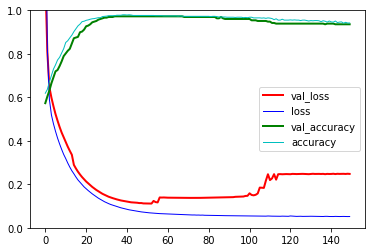

In [98]:
plt.plot(a.history['val_loss'], 'r-', lw=2, label='val_loss')
plt.plot(a.history['loss'], 'b-', lw=1, label='loss')
plt.plot(a.history['val_accuracy'], 'g-', lw=2, label='val_accuracy')
plt.plot(a.history['accuracy'], 'c-', lw=1, label='accuracy')
plt.ylim(0.0, 1.0)
plt.legend()

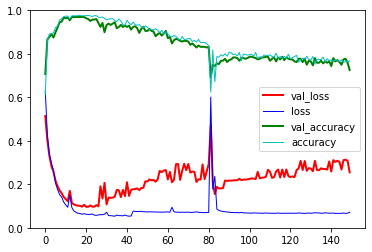

In [99]:
plt.plot(b.history['val_loss'], 'r-', lw=2, label='val_loss')
plt.plot(b.history['loss'], 'b-', lw=1, label='loss')
plt.plot(b.history['val_accuracy'], 'g-', lw=2, label='val_accuracy')
plt.plot(b.history['accuracy'], 'c-', lw=1, label='accuracy')
plt.ylim(0.0, 1.0)
plt.legend()

In [99]:
# титаник линейно разделим. Поэтому многослойная нейронная сеть привела к переобучению